# Neural Network from Scratch for Credit Default Prediction

## Objective
This project implements a fully functional feed-forward neural network from scratch
using NumPy to predict credit card default risk. The objective is to understand and
demonstrate the internal mechanics of neural networks without relying on deep learning
frameworks such as TensorFlow or PyTorch.

## Dataset
**Credit Card Default Dataset (Taiwan, 2005)**  
The dataset contains demographic information, credit limits, payment history,
bill statements, and repayment behavior of credit card clients. The target variable
indicates whether a client defaulted on their payment in the following month.

## Key Concepts Implemented
- Data preprocessing and feature scaling  
- Binary classification using neural networks  
- Forward propagation  
- Backpropagation with gradient descent  
- Binary cross-entropy loss  
- ReLU and Sigmoid activation functions  
- Model evaluation and comparison with ML baselines  

## Why This Project
Most neural network implementations rely on high-level libraries that abstract away
core learning mechanics. This project focuses on manually building the training pipeline
to gain a deeper understanding of how neural networks learn from data.

## Tools & Libraries
- Python  
- NumPy  
- Pandas  
- Matplotlib  

## Author
**Saksham Asopa**


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#loading the dataset
df=pd.read_csv('UCI_Credit_Card.csv')

In [3]:
print(df.head())
print('-'*95)
print(df.info())
print('-'*95)
print(df.describe())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
0   1    20000.0    2          2         1   24      2      2     -1     -1  \
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
0  ...        0.0        0.0        0.0       0.0     689.0       0.0  \
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [4]:
#for missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

#### Since there is no null values present, lets dive into pre processing

In [6]:
X=df.drop(['ID','default.payment.next.month'],axis=1)
y=df['default.payment.next.month'].values.reshape(-1,1)

In [7]:
#applying OHE in catagorical features
X=pd.get_dummies(X,columns=['SEX','EDUCATION','MARRIAGE'],drop_first=True)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [10]:
#lets split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=20,stratify=y)

In [11]:
print("training shape",X_train.shape)
print("testing shape",X_test.shape)

training shape (22500, 30)
testing shape (7500, 30)


#### The splitting up of dataset is done Lets first use a Simple ML model

In [12]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
logreg=LogisticRegression()
logreg.fit(X_train,y_train.ravel())

LogisticRegression()

In [13]:
lr_pred=logreg.predict(X_test)
lr_proba=logreg.predict_proba(X_test)[:,1]

In [14]:
print(accuracy_score(y_test,lr_pred))
print('-'*95)
print(roc_auc_score(y_test,lr_proba))
print('-'*95)
print(confusion_matrix(y_test,lr_pred))
print('-'*95)
print(classification_report(y_test,lr_pred))

0.806
-----------------------------------------------------------------------------------------------
0.7088984263410352
-----------------------------------------------------------------------------------------------
[[5670  171]
 [1284  375]]
-----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5841
           1       0.69      0.23      0.34      1659

    accuracy                           0.81      7500
   macro avg       0.75      0.60      0.61      7500
weighted avg       0.79      0.81      0.77      7500



#### Here we got accuracy and roc score which is not bad but not good either, so we will make another baseline ml model

In [15]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=7,n_jobs=-1,random_state=20)

In [16]:
rf.fit(X_train,y_train.ravel())

RandomForestClassifier(max_depth=7, n_jobs=-1, random_state=20)

In [17]:
rf_pred=rf.predict(X_test)
rf_proba=rf.predict_proba(X_test)[:,1]

In [18]:
print(accuracy_score(y_test,rf_pred))
print('-'*95)
print(roc_auc_score(y_test,rf_proba))
print('-'*95)
print(confusion_matrix(y_test,rf_pred))
print('-'*95)
print(classification_report(y_test,rf_pred))

0.8182666666666667
-----------------------------------------------------------------------------------------------
0.7636204094045759
-----------------------------------------------------------------------------------------------
[[5582  259]
 [1104  555]]
-----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5841
           1       0.68      0.33      0.45      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500



#### It is slightly better but now lets BUILD a neural network from Scratch, before that Lets plot important features

In [19]:
imp=rf.feature_importances_
name=X.columns
feature_df=pd.DataFrame({'Feature':name,'Importance':imp}).sort_values(by='Importance',ascending=False)

In [20]:
print("Important Features are \n",feature_df.head(10))

Important Features are 
       Feature  Importance
2       PAY_0    0.286353
3       PAY_2    0.162682
4       PAY_3    0.088480
6       PAY_5    0.072418
5       PAY_4    0.068224
7       PAY_6    0.044186
14   PAY_AMT1    0.036875
0   LIMIT_BAL    0.033431
15   PAY_AMT2    0.022001
8   BILL_AMT1    0.021725


#### Lets build a neural network
#### I will be using: 1 hidden layer(ReLu), 1 output layer(Sigmoid), loss=Binary cross entrop, optimization=Gradient descent

In [48]:
#Activation Functions
def sigmoid(z):
    return 1/(1+np.exp(-z))
def ds(a):
    return a*(1-a);
def relu(z):
    return np.maximum(0,z)
def dr(z):
    return (z>0).astype(float)

In [49]:
#Initialization
def initialize(d1,d2):
    np.random.seed()
    w1=np.random.randn(d1,d2)*0.01
    b1=np.zeros((1,d2))
    w2=np.random.randn(d2,1)*0.01
    b2=np.zeros((1,1))
    return w1,b1,w2,b2

In [50]:
#Frwd Propagation
def frwd_propagation(X,w1,b1,w2,b2):
    z1=X.dot(w1)+b1 #Z=WX+b
    a1=relu(z1)
    z2=a1.dot(w2)+b2
    a2=sigmoid(z2)
    cache=(z1,a1,z2,a2)
    return a2,cache

In [84]:
#loss
def loss(a2,Y):
    m=Y.shape[0]
    l=-np.sum(Y*np.log(a2+1e-8)+(1-Y)*np.log((1-a2)+1e-8))/m
    return l

In [78]:
#backward propagation
def backwd_propagation(X,Y,w2,cache):
    m=X.shape[0]
    z1,a1,z2,a2=cache
    dz2=a2-Y
    dw2=(a1.T.dot(dz2))/m
    db2=np.sum(dz2,axis=0,keepdims=True)/m
    da1=dz2.dot(w2.T)
    dz1=da1*dr(z1)
    dw1=X.T.dot(dz1)/m
    db1=np.sum(dz1,axis=0,keepdims=True)/m
    return dw1,db1,dw2,db2

In [79]:
#updating the parameters
def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,lr):
    w1-=lr*dw1
    b1-=lr*db1
    w2-=lr*dw2
    b2-=lr*db2
    return w1,b1,w2,b2

In [85]:
#Training fn
def train(X,Y,hidden_dim=16,lr=0.01,epochs=1000):
    input_dim=X.shape[1]
    w1,b1,w2,b2=initialize(input_dim,hidden_dim)
    losses=[]
    for i in range(epochs):
        a2,cache=frwd_propagation(X,w1,b1,w2,b2)
        l=loss(a2,Y)
        losses.append(l)
        #forward progagation done, now backwards
        dw1,db1,dw2,db2=backwd_propagation(X,Y,w2,cache)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,lr)
        if i%100==0:
            print(f'Epoch{i}, Loss:{l}')
    param=(w1,b1,w2,b2)
    return param,losses

In [86]:
#Prediction
def predict(X, param):
    w1,b1,w2,b2=param
    a2,_=frwd_propagation(X,w1,b1,w2,b2)
    return (a2>0.5).astype(int)

Epoch0, Loss:0.6933730027080298
Epoch100, Loss:0.6316504302537105
Epoch200, Loss:0.5940107021920252
Epoch300, Loss:0.5706431142894909
Epoch400, Loss:0.5558257778287548
Epoch500, Loss:0.5462186745240734
Epoch600, Loss:0.5398423485538162
Epoch700, Loss:0.5354943056808361
Epoch800, Loss:0.5324282255954654
Epoch900, Loss:0.5301635491701733


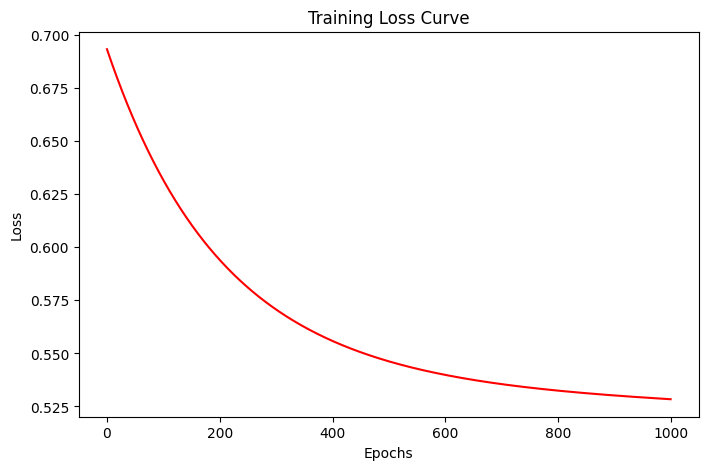

In [87]:
#training nn
param,losses=train(X_train,y_train,hidden_dim=16,lr=0.01,epochs=1000)
plt.figure(figsize=(8,5))
plt.plot(losses,color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [89]:
#Evaluation
nn_pred=predict(X_test,param)
print(accuracy_score(y_test,nn_pred))
print(confusion_matrix(y_test,nn_pred))
print(classification_report(y_test,nn_pred))

0.7788
[[5841    0]
 [1659    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5841
           1       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500



C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [92]:
type(X_train)

numpy.ndarray

In [93]:
X_train=pd.DataFrame(X_train)

In [94]:
type(X_train)

pandas.core.frame.DataFrame

In [95]:
import pickle
with open("nn_model.pkl","wb") as f:
    pickle.dump(param,f)

In [96]:
with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)

In [97]:
with open("columns.pkl","wb") as f:
    pickle.dump(X_train.columns.tolist(),f)

In [98]:
import os
os.listdir()

['.ipynb_checkpoints',
 'columns.pkl',
 'nn_model.pkl',
 'scaler.pkl',
 'UCI_Credit_Card.csv',
 'Untitled.ipynb']